## Coffee Bean Classification Project
The project is a classification of images on "coffee bean dataset resized". It is a computer vision project that classifies the coffee beans by looking their colours. There are 4 labels that are Dark, Green, Light and Medium.

<table>
  <tr><td>
    <img src="https://i.pinimg.com/564x/70/24/98/702498e0289cd18be9c160eb81357b30.jpg"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  
</table>



**The Data**<br>
The dataset is labeled into 4 different classes.

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>Dark</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Green</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Light</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Medium</td>
  </tr>
</table>
<br>


# Goodluck!

## Part 0 -  Utiles

### Import Libraries

In [ ]:
%%capture
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt 
import tensorflow as tf
from tensorflow import keras
import matplotlib.image as mpimg
import random
import numpy as np
import os
import pathlib 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, log_loss
!pip install -U --no-cache-dir gdown --pre
!gdown --id 1anU5YH4vRueTEF-ZGGDEDvEY4FNfSOjF
!unzip /content/archive.zip


In [ ]:
!gdown --version

gdown 4.6.0 at /usr/local/lib/python3.8/dist-packages


## Part 1 - Data Preprocessing

### Data exploration

How many classes do we have?



In [ ]:
num_of_coffee_bean_classes = len(os.listdir('/content/train'))
print(f'There are {num_of_coffee_bean_classes} different classes')

There are 4 different classes


What are those classes?

In [ ]:
data_dir = pathlib.Path('/content/train')
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(f'Name of classes:\n{class_names}')

Name of classes:
['Dark' 'Green' 'Light' 'Medium']


Let's create a function to visualize images randomly

In [ ]:
def view_random_image(target_dir, target_class):
  target_folder = target_dir + target_class
  random_image = random.sample(os.listdir(target_folder), 1)
  img = mpimg.imread(target_folder + '/' + random_image[0] )
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off')

  print(f'Image shape: {img.shape}')
  
  return img

Let's visualize images from all categories



Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)


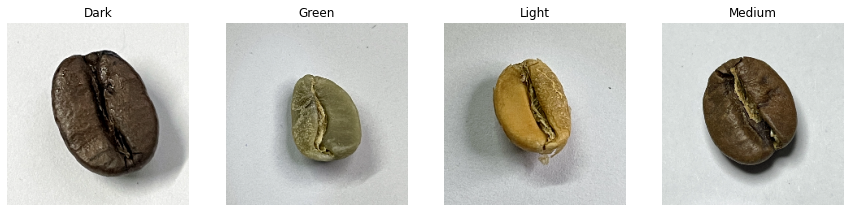

In [ ]:
plt.figure(figsize = (15,7))
plt.subplot(1,4,1)
dark_bean_image = view_random_image('/content/train/', "Dark")
plt.subplot(1,4,2)
green_bean_image = view_random_image('/content/train/', "Green")
plt.subplot(1,4,3)
light_bean_image = view_random_image('/content/train/', "Light")
plt.subplot(1,4,4)
medium_bean_image = view_random_image('/content/train/', "Medium")

Lets's see what the csv file contains

In [ ]:
df = pd.read_csv('/content/Coffee Bean.csv')
df.head()

,class index,filepaths,labels,data set
0,0,train/Dark/dark (1).png,Dark,train
1,0,train/Dark/dark (10).png,Dark,train
2,0,train/Dark/dark (100).png,Dark,train
3,0,train/Dark/dark (101).png,Dark,train
4,0,train/Dark/dark (102).png,Dark,train


**From here you will have to continue on your own. Goodluck!**

##setting our data set as arrays and matrixs for the images.

In [ ]:
from PIL import Image
data = pd.read_csv("/content/Coffee Bean.csv")
y_train = [int(row["class index"]) for (index,row) in data.iterrows() if row["data set"] == "train"]
print(y_train)
x_trainD = [row.filepaths for (index,row) in data.iterrows() if row["data set"] == "train"]
y_test = [int(row["class index"]) for (index,row) in data.iterrows() if row["data set"] == "test"]
print(y_test)
x_testD = [row.filepaths for (index,row) in data.iterrows() if row["data set"] == "test"]
print(x_trainD)
x_train = []
x_test = []

# load image as pixel array
for _ in range (len(x_trainD)):
  img = Image.open(x_trainD[_])
  data = np.asarray(img)
  x_train.append(data)

for _ in range (len(x_testD)):
  img = Image.open(x_testD[_])
  data = np.asarray(img)
  x_test.append(data)
  
y_train = np.array(y_train)
y_test = np.array(y_test)

x_train = np.array(x_train)
x_test = np.array(x_test)
print(x_train.shape)


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

#Base Model:
NN Hyper Parameters:
in this section we will present the naive solution for this problem.
we will use the basic neural network model with one hidden layer network,
standart learning rate and epochs (3 x data colums).


In [ ]:

cnn = tf.keras.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[224, 224, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=16, strides=5))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(128,activation='relu'))
cnn.add(tf.keras.layers.Dense(units=4, activation='softmax'))
cnn.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 42, 42, 32)       0         
 2D)                                                             
                                                                 
 flatten_5 (Flatten)         (None, 56448)             0         
                                                                 
 dense_10 (Dense)            (None, 128)               7225472   
                                                                 
 dense_11 (Dense)            (None, 4)                 516       
                                                                 
Total params: 7,226,884
Trainable params: 7,226,884
Non-trainable params: 0
____________________________________________

#complie base model


In [ ]:
cnn.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = cnn.fit(x_train, y_train, epochs=10, validation_data=(x_test,y_test))

Epoch 1/10
38/38 [==============================] - 9s 36ms/step - loss: 878.8865 - accuracy: 0.4458 - val_loss: 8.2257 - val_accuracy: 0.7700
Epoch 2/10
38/38 [==============================] - 1s 27ms/step - loss: 6.3028 - accuracy: 0.8100 - val_loss: 2.7110 - val_accuracy: 0.8550
Epoch 3/10
38/38 [==============================] - 1s 27ms/step - loss: 1.4683 - accuracy: 0.9242 - val_loss: 0.2454 - val_accuracy: 0.9775
Epoch 4/10
38/38 [==============================] - 1s 27ms/step - loss: 0.6621 - accuracy: 0.9517 - val_loss: 0.0145 - val_accuracy: 0.9925
Epoch 5/10
38/38 [==============================] - 1s 27ms/step - loss: 0.1100 - accuracy: 0.9850 - val_loss: 0.0155 - val_accuracy: 0.9950
Epoch 6/10
38/38 [==============================] - 1s 27ms/step - loss: 0.0735 - accuracy: 0.9908 - val_loss: 0.0087 - val_accuracy: 0.9975
Epoch 7/10
38/38 [==============================] - 1s 27ms/step - loss: 0.1157 - accuracy: 0.9808 - val_loss: 0.0333 - val_accuracy: 0.9925
Epoch 8/10


#first Experiment
we are changing arcitature fearure,
using softmax activation instad of relu.


In [ ]:
cnn = tf.keras.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[224, 224, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=16, strides=5))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(128,activation='relu'))
cnn.add(tf.keras.layers.Dense(units=4, activation='softmax'))
cnn.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 42, 42, 32)       0         
 2D)                                                             
                                                                 
 flatten_6 (Flatten)         (None, 56448)             0         
                                                                 
 dense_12 (Dense)            (None, 128)               7225472   
                                                                 
 dense_13 (Dense)            (None, 4)                 516       
                                                                 
Total params: 7,226,884
Trainable params: 7,226,884
Non-trainable params: 0
____________________________________________

In [ ]:
cnn.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])


In [ ]:
history = cnn.fit(x_train, y_train, epochs=10, validation_data=(x_test,y_test))

Epoch 1/10
38/38 [==============================] - 2s 47ms/step - loss: 0.8933 - accuracy: 0.7408 - val_loss: 0.8750 - val_accuracy: 0.7450
Epoch 2/10
38/38 [==============================] - 2s 42ms/step - loss: 0.8547 - accuracy: 0.7483 - val_loss: 0.8388 - val_accuracy: 0.7500
Epoch 3/10
38/38 [==============================] - 2s 42ms/step - loss: 0.8264 - accuracy: 0.7500 - val_loss: 0.8133 - val_accuracy: 0.7500
Epoch 4/10
38/38 [==============================] - 2s 42ms/step - loss: 0.8018 - accuracy: 0.7442 - val_loss: 0.7894 - val_accuracy: 0.7500
Epoch 5/10
38/38 [==============================] - 2s 44ms/step - loss: 0.7786 - accuracy: 0.7500 - val_loss: 0.7670 - val_accuracy: 0.7500
Epoch 6/10
38/38 [==============================] - 2s 43ms/step - loss: 0.7569 - accuracy: 0.7500 - val_loss: 0.7460 - val_accuracy: 0.7500
Epoch 7/10
38/38 [==============================] - 2s 42ms/step - loss: 0.7366 - accuracy: 0.7350 - val_loss: 0.7263 - val_accuracy: 0.7500
Epoch 8/10
38